#IMPORTING LIBRARIES AND READIND DATA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_healthcare.csv")

In [3]:
df.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,133.0,0.003,0.000,0.004,0.004,0.0,0.000,30.0,1.5,0.0,...,67.0,169.0,9.0,1.0,147.0,137.0,144.0,40.0,1.0,1.0
1,130.0,0.001,0.001,0.012,0.010,0.0,0.001,62.0,2.2,0.0,...,50.0,211.0,9.0,0.0,60.0,89.0,113.0,250.0,0.0,3.0
2,141.0,0.000,0.008,0.000,0.000,0.0,0.000,75.0,0.3,49.0,...,136.0,145.0,1.0,0.0,143.0,141.0,143.0,0.0,1.0,2.0
3,144.0,0.000,0.002,0.002,0.000,0.0,0.000,84.0,0.3,34.0,...,132.0,170.0,2.0,0.0,144.0,143.0,145.0,0.0,-1.0,3.0
4,106.0,0.001,0.000,0.011,0.000,0.0,0.000,63.0,0.6,0.0,...,95.0,125.0,1.0,0.0,112.0,110.0,112.0,1.0,0.0,1.0
5,135.0,0.006,0.000,0.006,0.005,0.0,0.000,27.0,1.5,0.0,...,69.0,165.0,5.0,2.0,143.0,139.0,142.0,17.0,1.0,1.0
6,127.0,0.000,0.000,0.007,0.006,0.0,0.000,20.0,2.2,0.0,...,81.0,159.0,4.0,0.0,131.0,122.0,124.0,23.0,0.0,1.0
7,110.0,0.003,0.000,0.003,0.001,0.0,0.000,64.0,1.6,0.0,...,62.0,178.0,12.0,1.0,107.0,105.0,108.0,37.0,0.0,1.0
8,140.0,0.000,0.022,0.000,0.000,0.0,0.000,78.0,0.2,86.0,...,136.0,144.0,1.0,0.0,141.0,140.0,141.0,0.0,0.0,3.0
9,125.0,0.000,0.000,0.006,0.006,0.0,0.001,65.0,1.3,0.0,...,78.0,155.0,4.0,0.0,110.0,111.0,113.0,8.0,0.0,1.0


# EDA

## CHECKING FOR NULL VALUES

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1488 non-null   float64
 1   accelerations                                           1488 non-null   float64
 2   fetal_movement                                          1488 non-null   float64
 3   uterine_contractions                                    1488 non-null   float64
 4   light_decelerations                                     1488 non-null   float64
 5   severe_decelerations                                    1488 non-null   float64
 6   prolongued_decelerations                                1488 non-null   float64
 7   abnormal_short_term_variability                         1488 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,...,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.00000,1488.000000,1488.000000,1488.000000,1488.000000
mean,133.100806,0.003222,0.009307,0.004360,0.001916,0.000002,0.000169,46.719758,1.343011,9.470430,...,93.061156,164.114247,4.061156,0.336022,137.337366,134.44422,137.972446,19.331989,0.325269,1.304435
std,10.037418,0.003876,0.044165,0.002972,0.002961,0.000045,0.000623,17.325868,0.890912,18.030735,...,29.458569,18.373700,2.967594,0.753378,16.530802,15.67541,14.589470,29.838886,0.612891,0.614272
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,76.00000,77.000000,0.000000,-1.000000,1.000000
25%,125.750000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,127.750000,124.00000,128.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,163.000000,3.000000,0.000000,139.000000,136.00000,139.000000,8.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,10.000000,...,119.000000,175.000000,6.000000,0.000000,148.000000,145.00000,148.000000,25.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,158.000000,238.000000,18.000000,10.000000,187.000000,182.00000,186.000000,269.000000,1.000000,3.000000


In [6]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

## CHECKING FOR UNIQUE VALUES

In [7]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [8]:
for cols in df.columns:
  print(" unique values in",cols,":",df[cols].nunique())

 unique values in baseline value : 48
 unique values in accelerations : 20
 unique values in fetal_movement : 83
 unique values in uterine_contractions : 16
 unique values in light_decelerations : 16
 unique values in severe_decelerations : 2
 unique values in prolongued_decelerations : 6
 unique values in abnormal_short_term_variability : 75
 unique values in mean_value_of_short_term_variability : 54
 unique values in percentage_of_time_with_abnormal_long_term_variability : 83
 unique values in mean_value_of_long_term_variability : 231
 unique values in histogram_width : 152
 unique values in histogram_min : 107
 unique values in histogram_max : 84
 unique values in histogram_number_of_peaks : 18
 unique values in histogram_number_of_zeroes : 9
 unique values in histogram_mode : 84
 unique values in histogram_mean : 94
 unique values in histogram_median : 87
 unique values in histogram_variance : 125
 unique values in histogram_tendency : 3
 unique values in fetal_health : 3


In [9]:
for cols in df.columns:
  print(" unique values in",cols,":",df[cols].unique())

 unique values in baseline value : [133. 130. 141. 144. 106. 135. 127. 110. 140. 125. 131. 128. 115. 136.
 134. 123. 146. 132. 137. 152. 139. 120. 148. 129. 151. 143. 159. 122.
 117. 121. 138. 145. 142. 150. 112. 149. 157. 124. 118. 126. 116. 119.
 114. 156. 147. 154. 158. 160.]
 unique values in accelerations : [0.003 0.001 0.    0.006 0.004 0.002 0.008 0.01  0.007 0.005 0.017 0.013
 0.009 0.012 0.014 0.011 0.019 0.016 0.015 0.018]
 unique values in fetal_movement : [0.    0.001 0.008 0.002 0.022 0.009 0.017 0.006 0.003 0.013 0.469 0.005
 0.02  0.369 0.007 0.012 0.011 0.041 0.01  0.014 0.054 0.06  0.065 0.055
 0.052 0.085 0.016 0.023 0.024 0.36  0.035 0.027 0.021 0.019 0.032 0.004
 0.235 0.047 0.025 0.063 0.34  0.04  0.05  0.015 0.157 0.135 0.043 0.455
 0.053 0.334 0.071 0.03  0.026 0.084 0.029 0.38  0.109 0.481 0.383 0.346
 0.049 0.222 0.079 0.103 0.298 0.048 0.353 0.088 0.335 0.028 0.018 0.058
 0.033 0.425 0.091 0.139 0.031 0.306 0.099 0.092 0.446 0.107 0.375]
 unique values in uter

## COUNTPLOTS

In [10]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


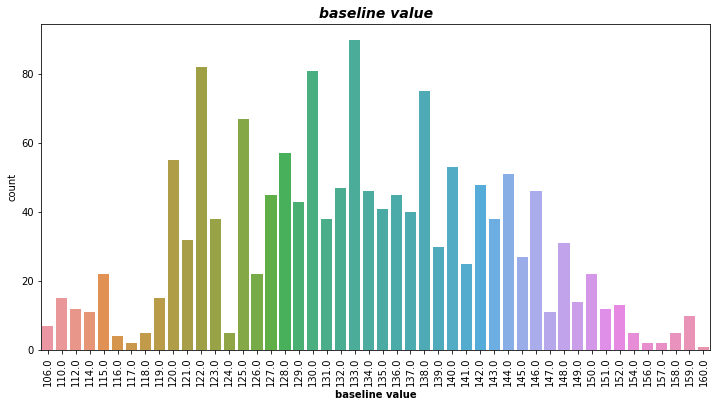

In [11]:
plt.figure(figsize = (12,6))
sns.countplot(df["baseline value"])
plt.title('baseline value', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xlabel('baseline value', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


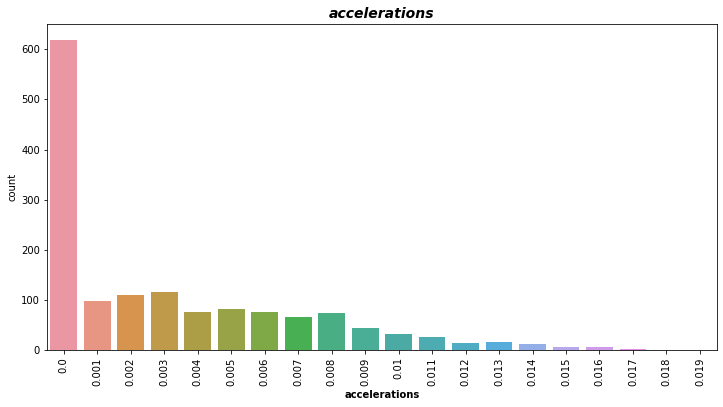

In [12]:
plt.figure(figsize = (12,6))
sns.countplot(df["accelerations"])
plt.title('accelerations', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xlabel('accelerations', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


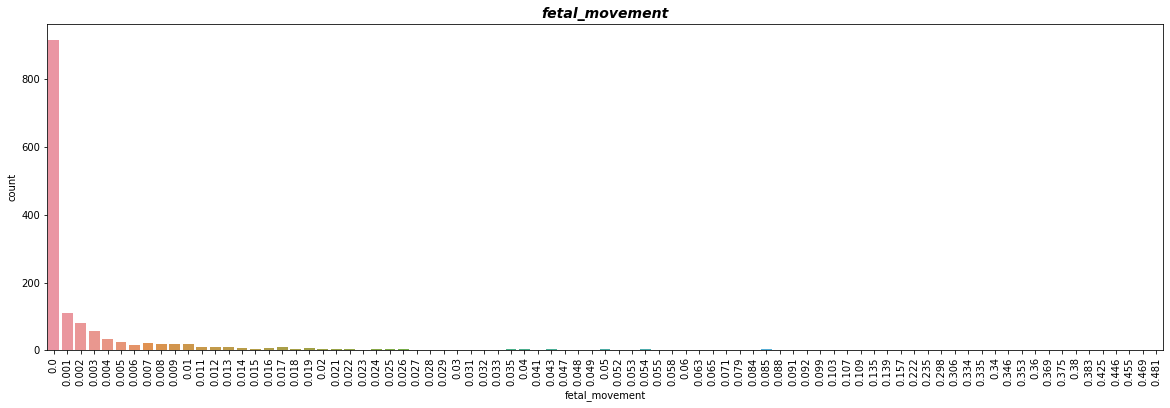

In [13]:
plt.figure(figsize = (20,6))
sns.countplot(df["fetal_movement"])
plt.title('fetal_movement', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


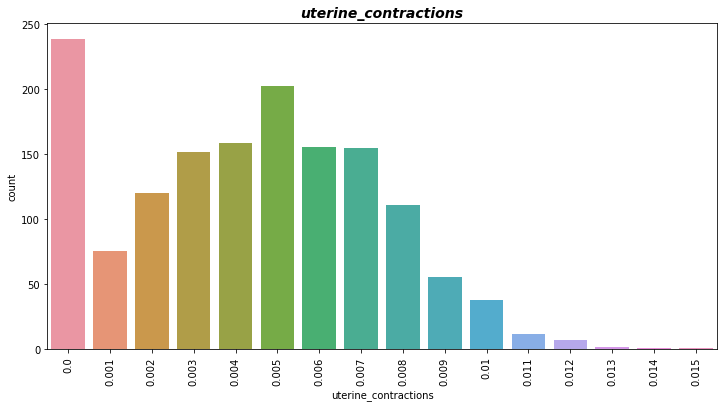

In [14]:
plt.figure(figsize = (12,6))
sns.countplot(df["uterine_contractions"])
plt.title('uterine_contractions', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


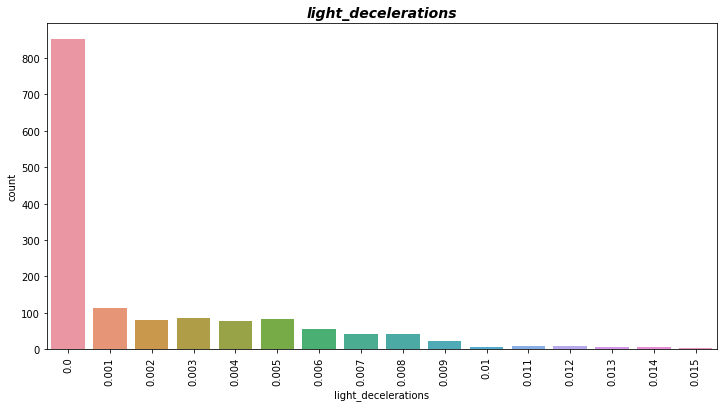

In [15]:
plt.figure(figsize = (12,6))
sns.countplot(df["light_decelerations"])
plt.title('light_decelerations', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


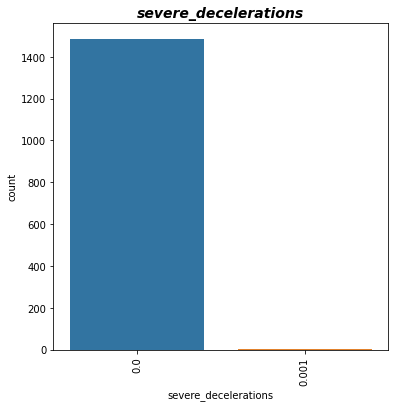

In [16]:
plt.figure(figsize = (6,6))
sns.countplot(df["severe_decelerations"])
plt.title('severe_decelerations', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


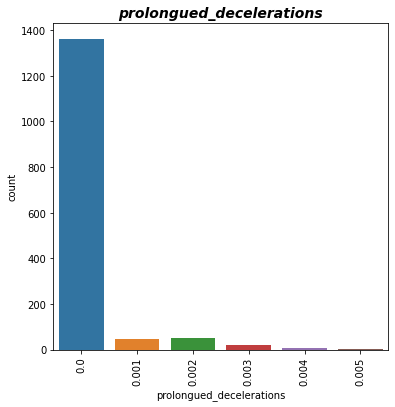

In [17]:
plt.figure(figsize = (6,6))
sns.countplot(df["prolongued_decelerations"])
plt.title('prolongued_decelerations', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


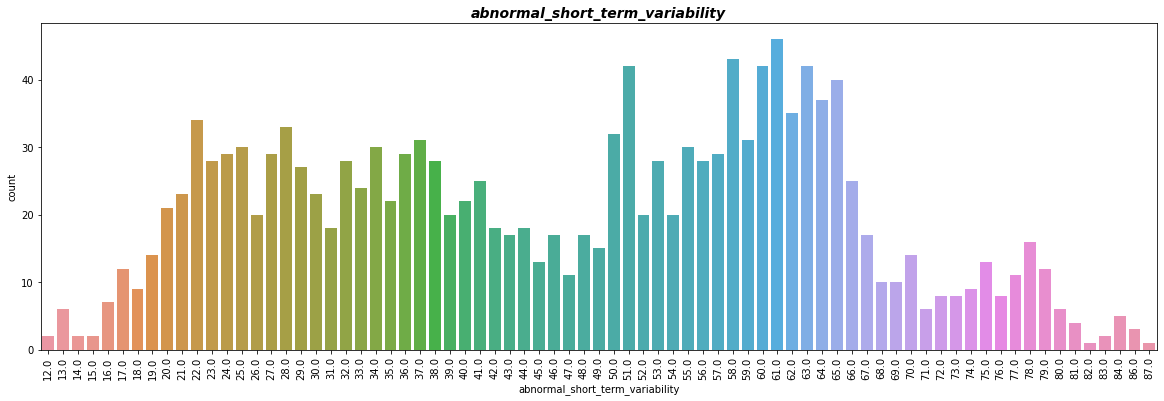

In [18]:
plt.figure(figsize = (20,6))
sns.countplot(df["abnormal_short_term_variability"])
plt.title('abnormal_short_term_variability', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


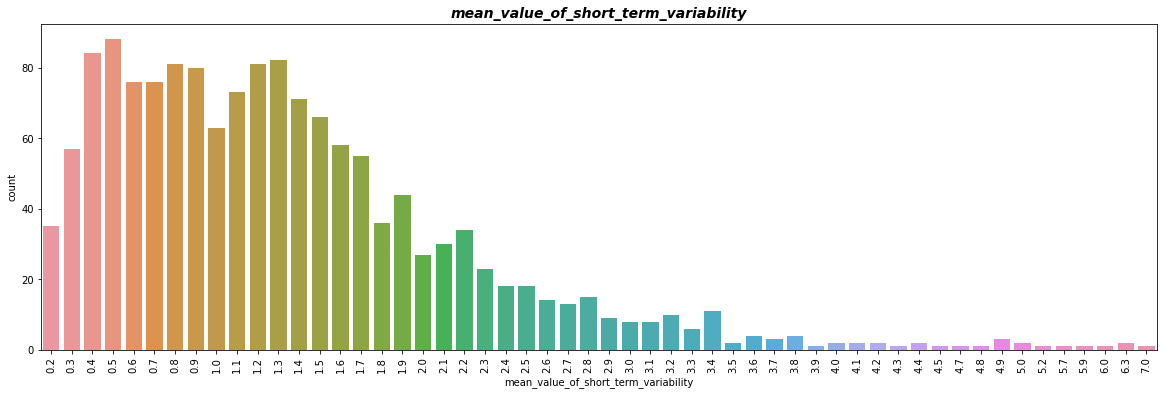

In [19]:
plt.figure(figsize = (20,6))
sns.countplot(df["mean_value_of_short_term_variability"])
plt.title('mean_value_of_short_term_variability', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


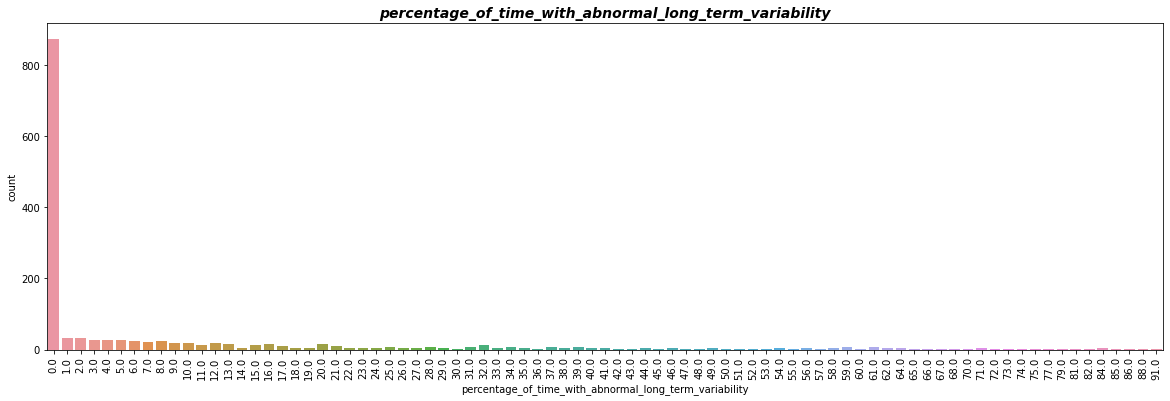

In [20]:
plt.figure(figsize = (20,6))
sns.countplot(df["percentage_of_time_with_abnormal_long_term_variability"])
plt.title('percentage_of_time_with_abnormal_long_term_variability', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


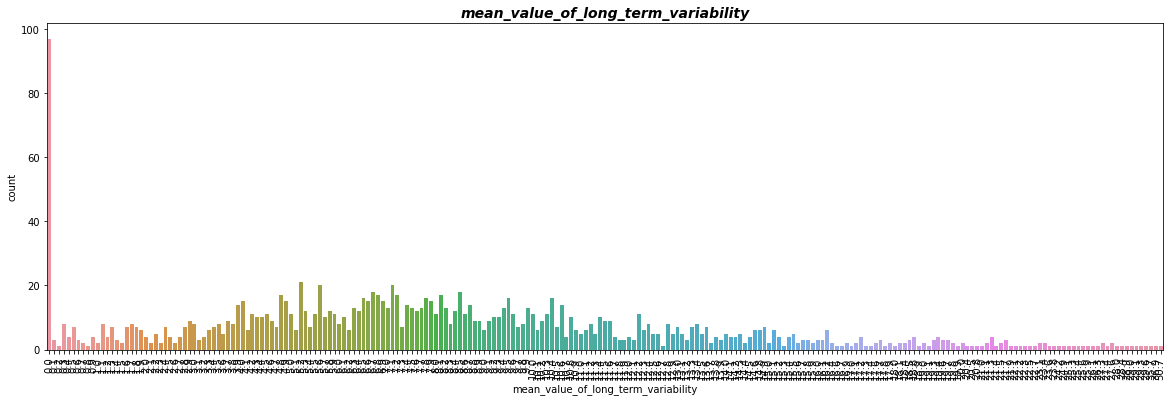

In [21]:
plt.figure(figsize = (20,6))
sns.countplot(df["mean_value_of_long_term_variability"])
plt.title('mean_value_of_long_term_variability', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


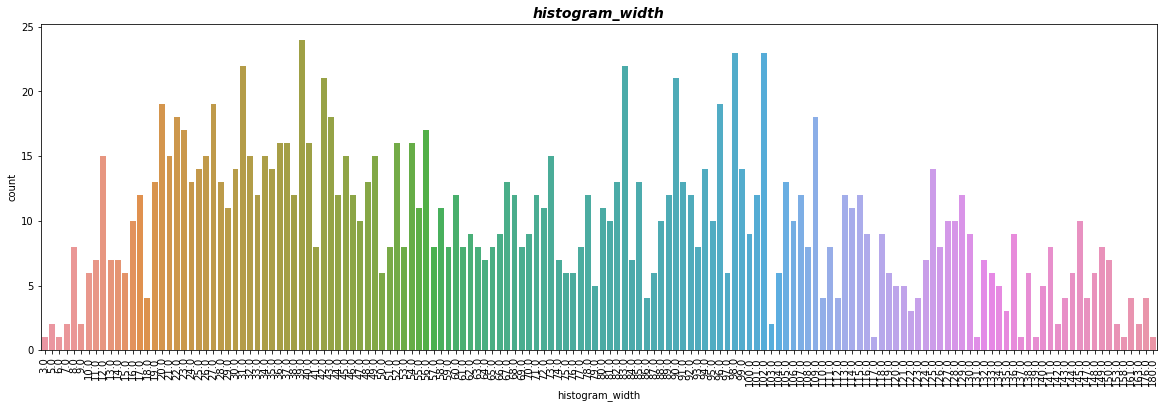

In [22]:
plt.figure(figsize = (20,6))
sns.countplot(df["histogram_width"])
plt.title('histogram_width', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


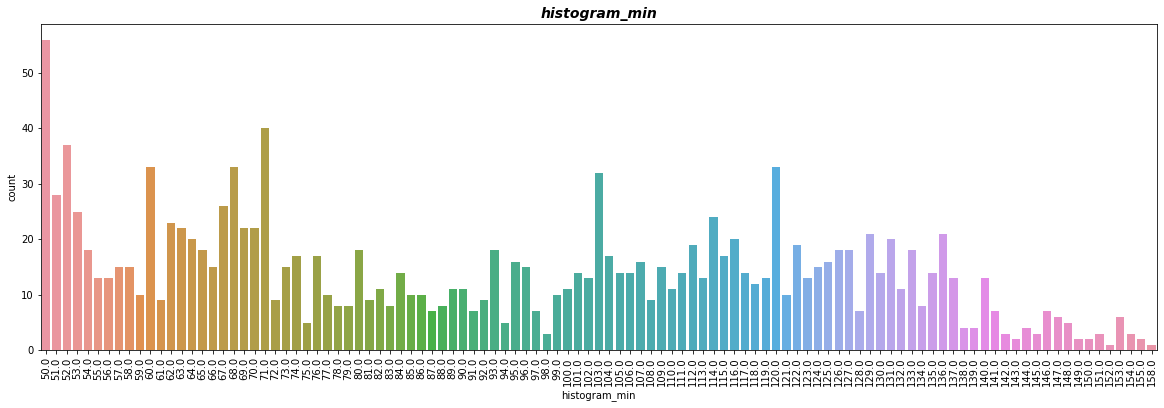

In [23]:
plt.figure(figsize = (20,6))
sns.countplot(df["histogram_min"])
plt.title('histogram_min', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


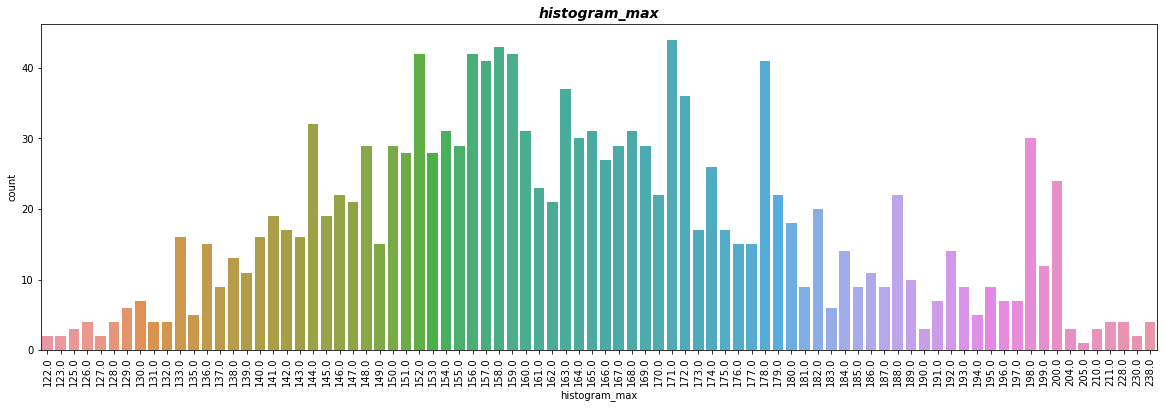

In [24]:
plt.figure(figsize = (20,6))
sns.countplot(df["histogram_max"])
plt.title('histogram_max', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


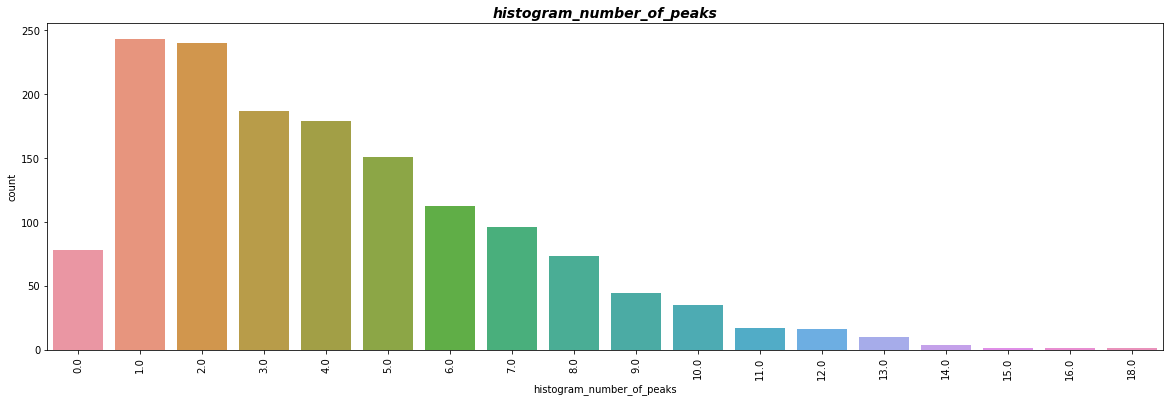

In [25]:
plt.figure(figsize = (20,6))
sns.countplot(df["histogram_number_of_peaks"])
plt.title('histogram_number_of_peaks', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


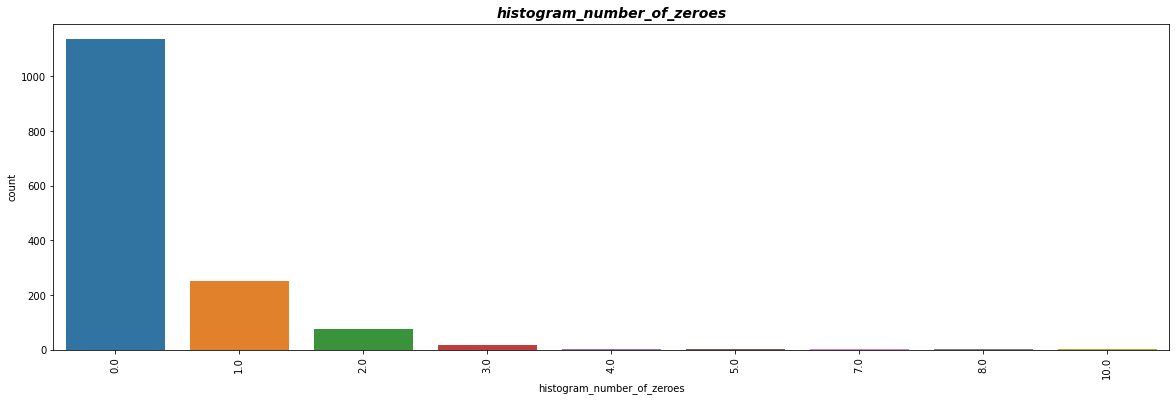

In [26]:
plt.figure(figsize = (20,6))
sns.countplot(df["histogram_number_of_zeroes"])
plt.title('histogram_number_of_zeroes', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


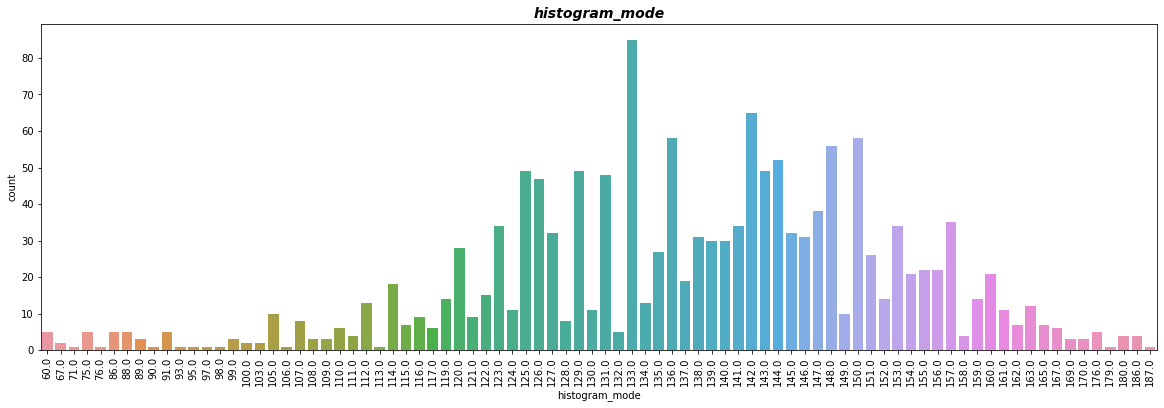

In [27]:
plt.figure(figsize = (20,6))
sns.countplot(df["histogram_mode"])
plt.title('histogram_mode', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


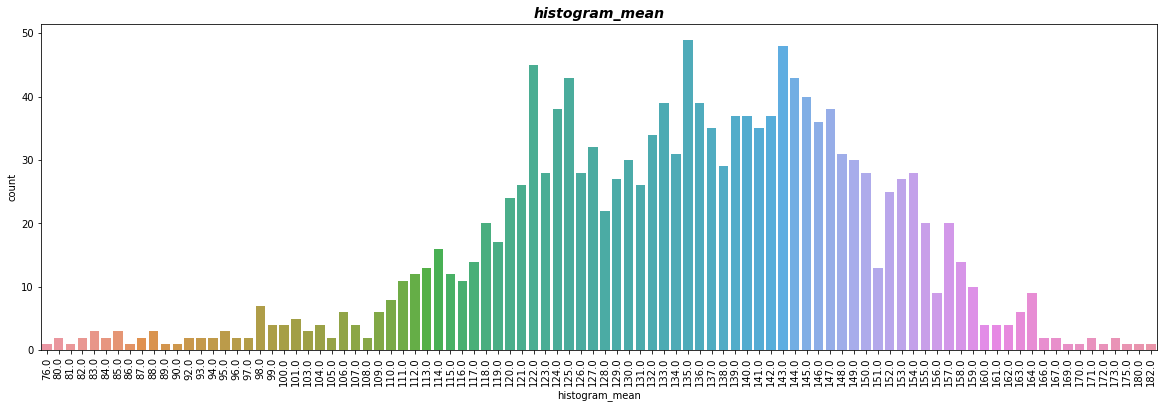

In [28]:
plt.figure(figsize = (20,6))
sns.countplot(df["histogram_mean"])
plt.title('histogram_mean', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


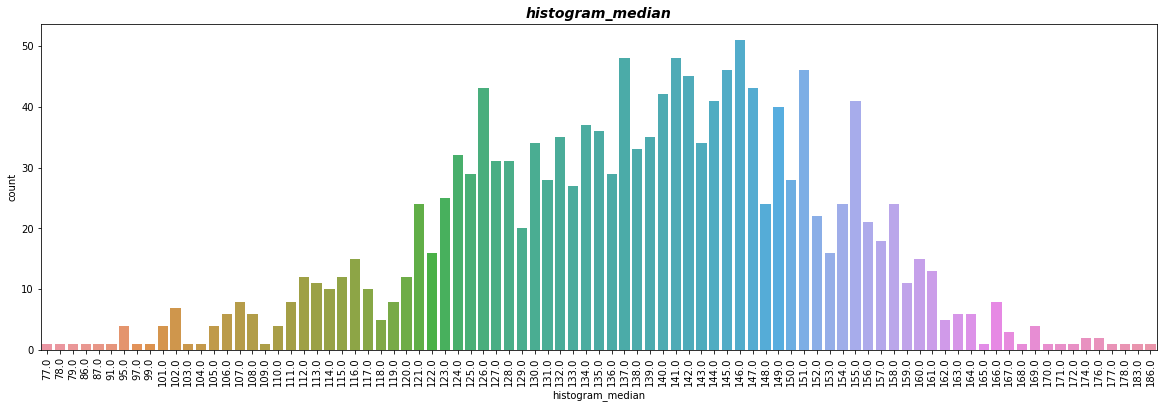

In [29]:
plt.figure(figsize = (20,6))
sns.countplot(df["histogram_median"])
plt.title('histogram_median', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


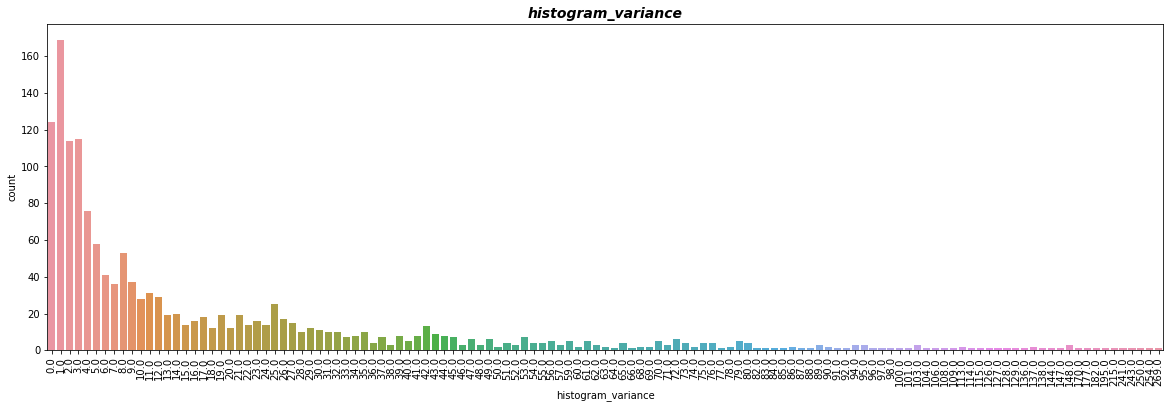

In [30]:
plt.figure(figsize = (20,6))
sns.countplot(df["histogram_variance"])
plt.title('histogram_variance', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


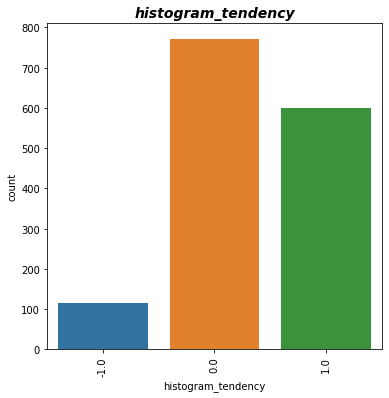

In [31]:
plt.figure(figsize = (6,6))
sns.countplot(df["histogram_tendency"])
plt.title('histogram_tendency', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


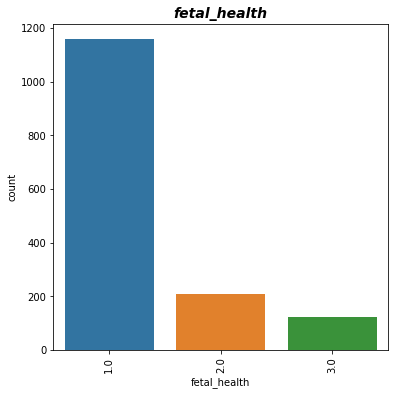

In [32]:
plt.figure(figsize = (6,6))
sns.countplot(df["fetal_health"])
plt.title('fetal_health', fontsize = 14, fontweight = 'bold', 
          fontstyle = 'italic')
plt.xticks(rotation = 90)
plt.show()

## HISTOGRAMS

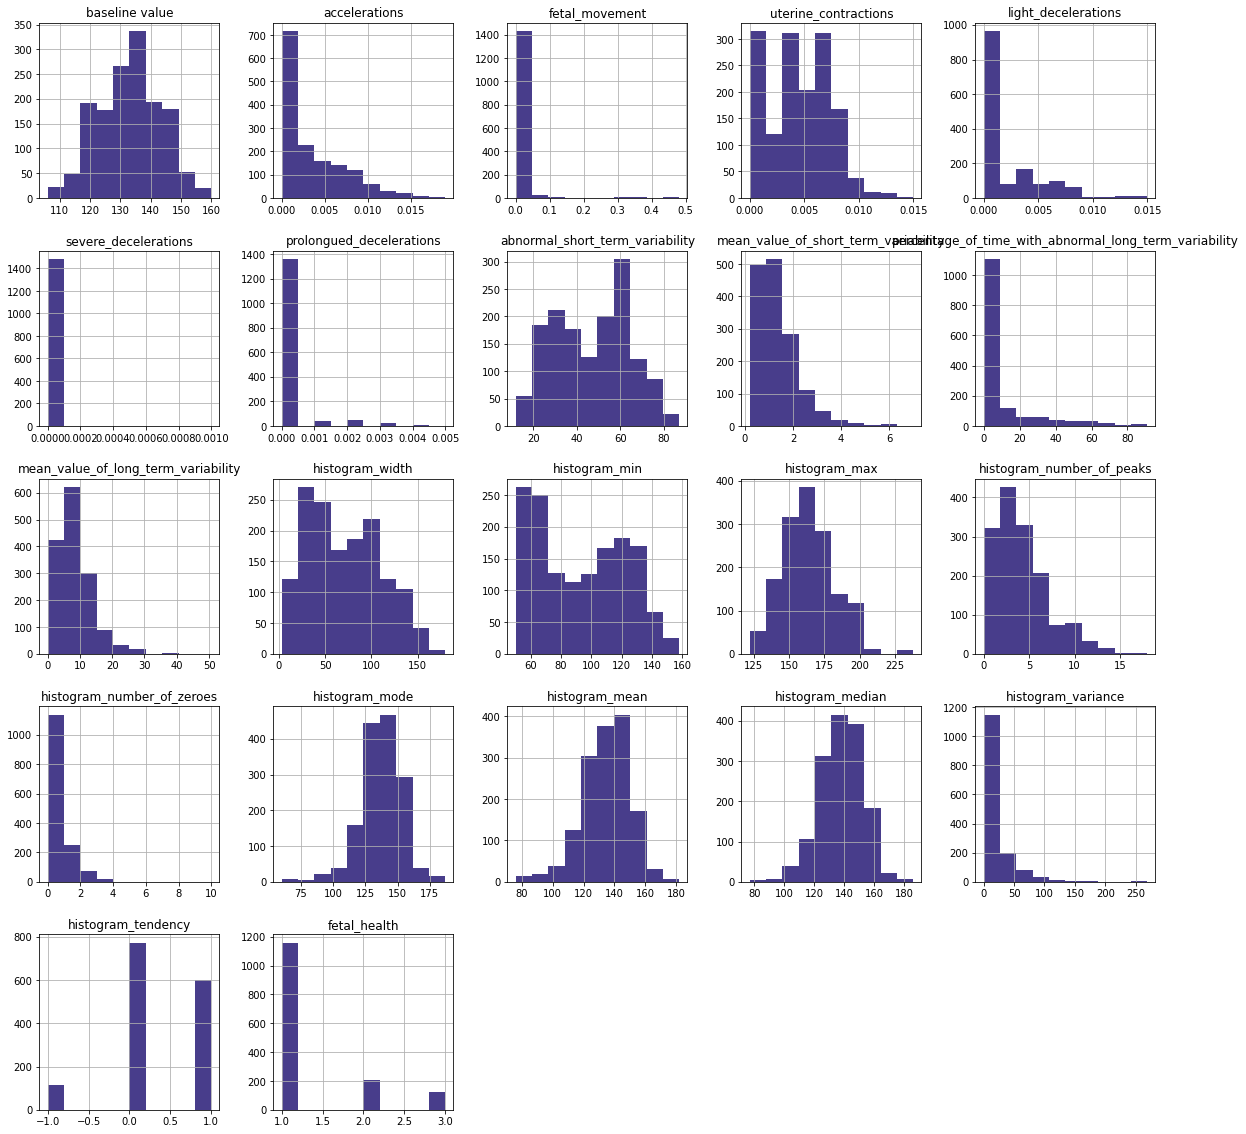

In [33]:
hist_plot = df.hist(figsize = (20,20), color = "#483D8B")

## BOXPLOTS (CHECKING OUTLIERS)

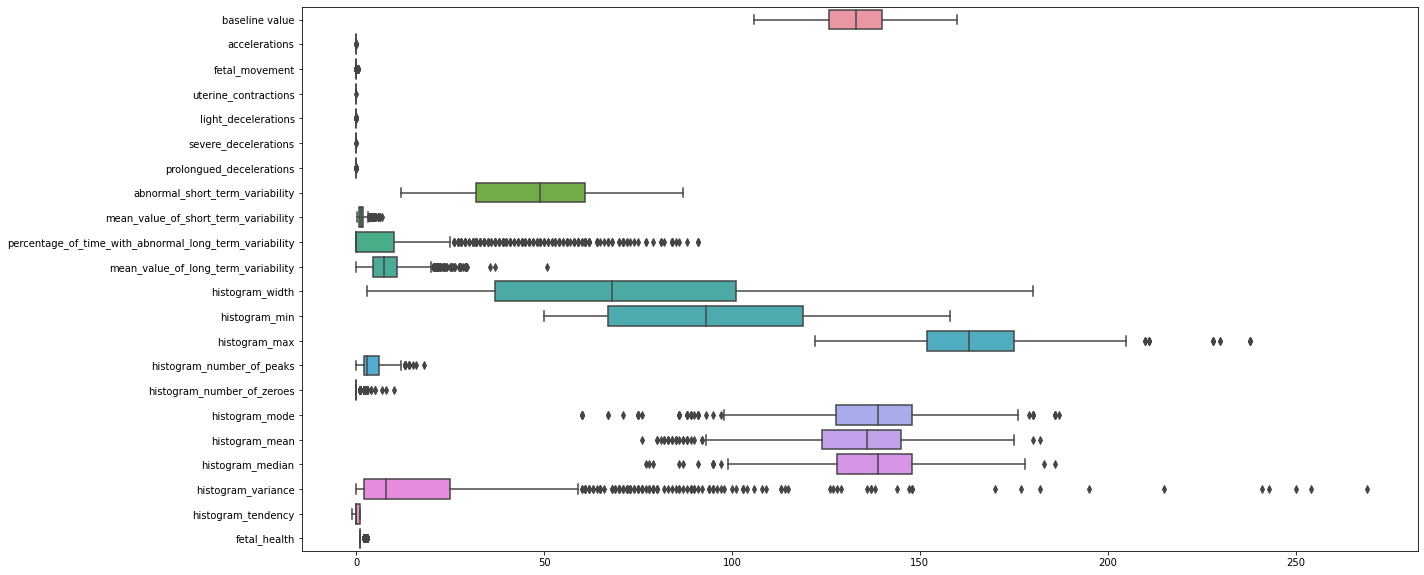

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot( data = df, orient="h")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


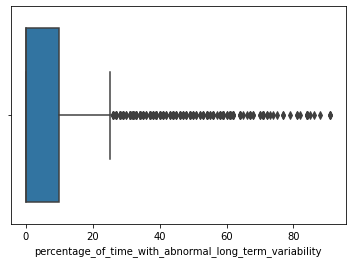

In [35]:
sns.boxplot(df['percentage_of_time_with_abnormal_long_term_variability'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

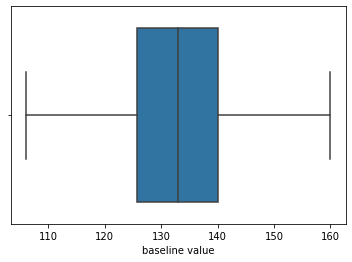

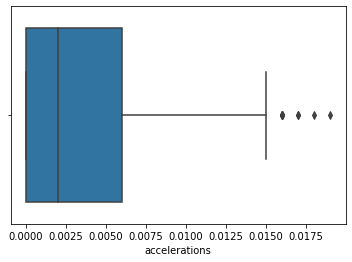

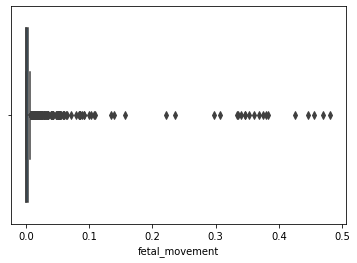

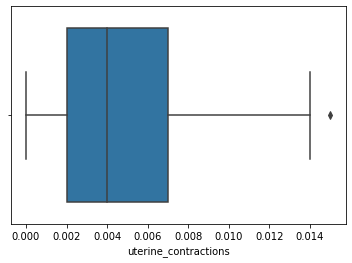

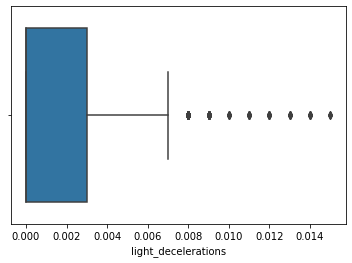

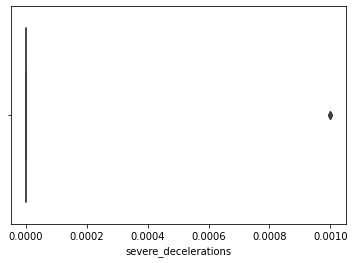

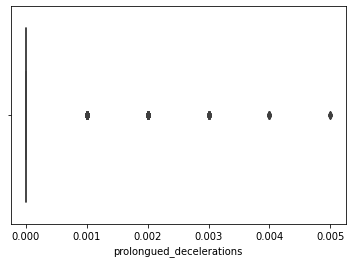

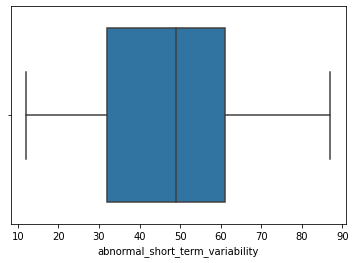

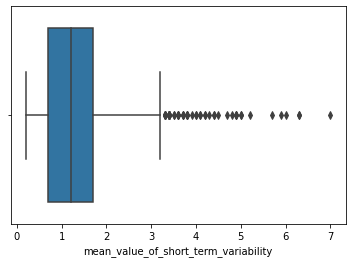

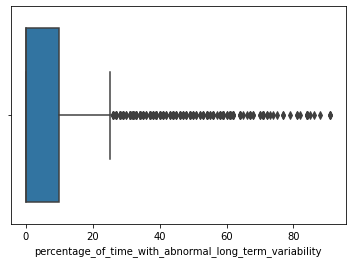

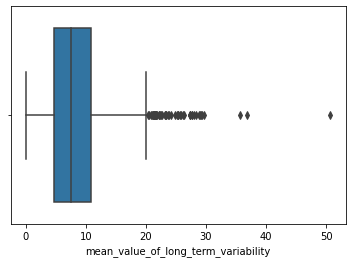

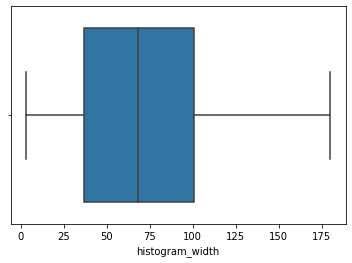

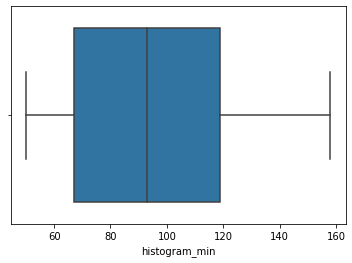

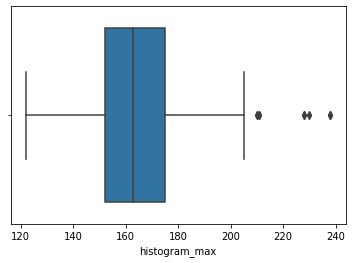

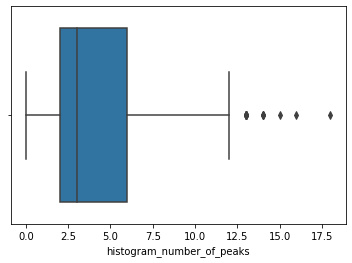

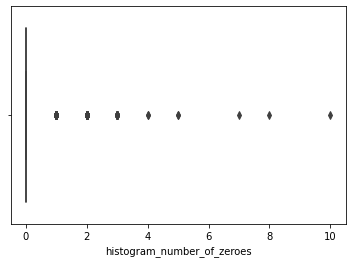

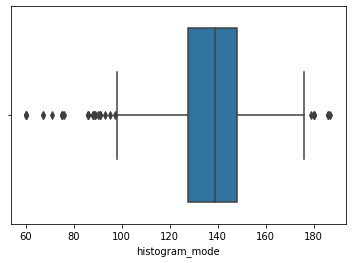

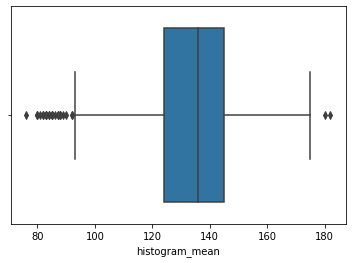

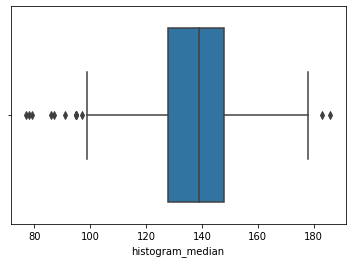

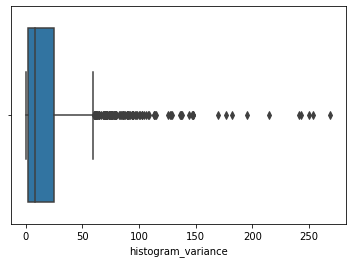

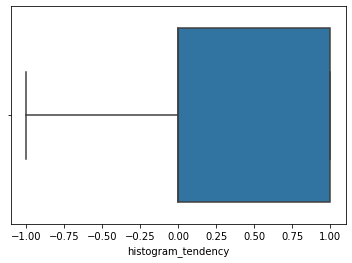

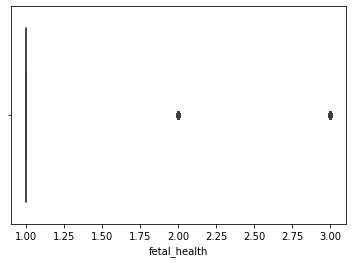

In [36]:
for column in df:
    plt.figure()
    sns.boxplot(df[column])

## PAIRPLOT

In [37]:
df["severe_decelerations"].value_counts()

0.000    1485
0.001       3
Name: severe_decelerations, dtype: int64

## HEATMAP

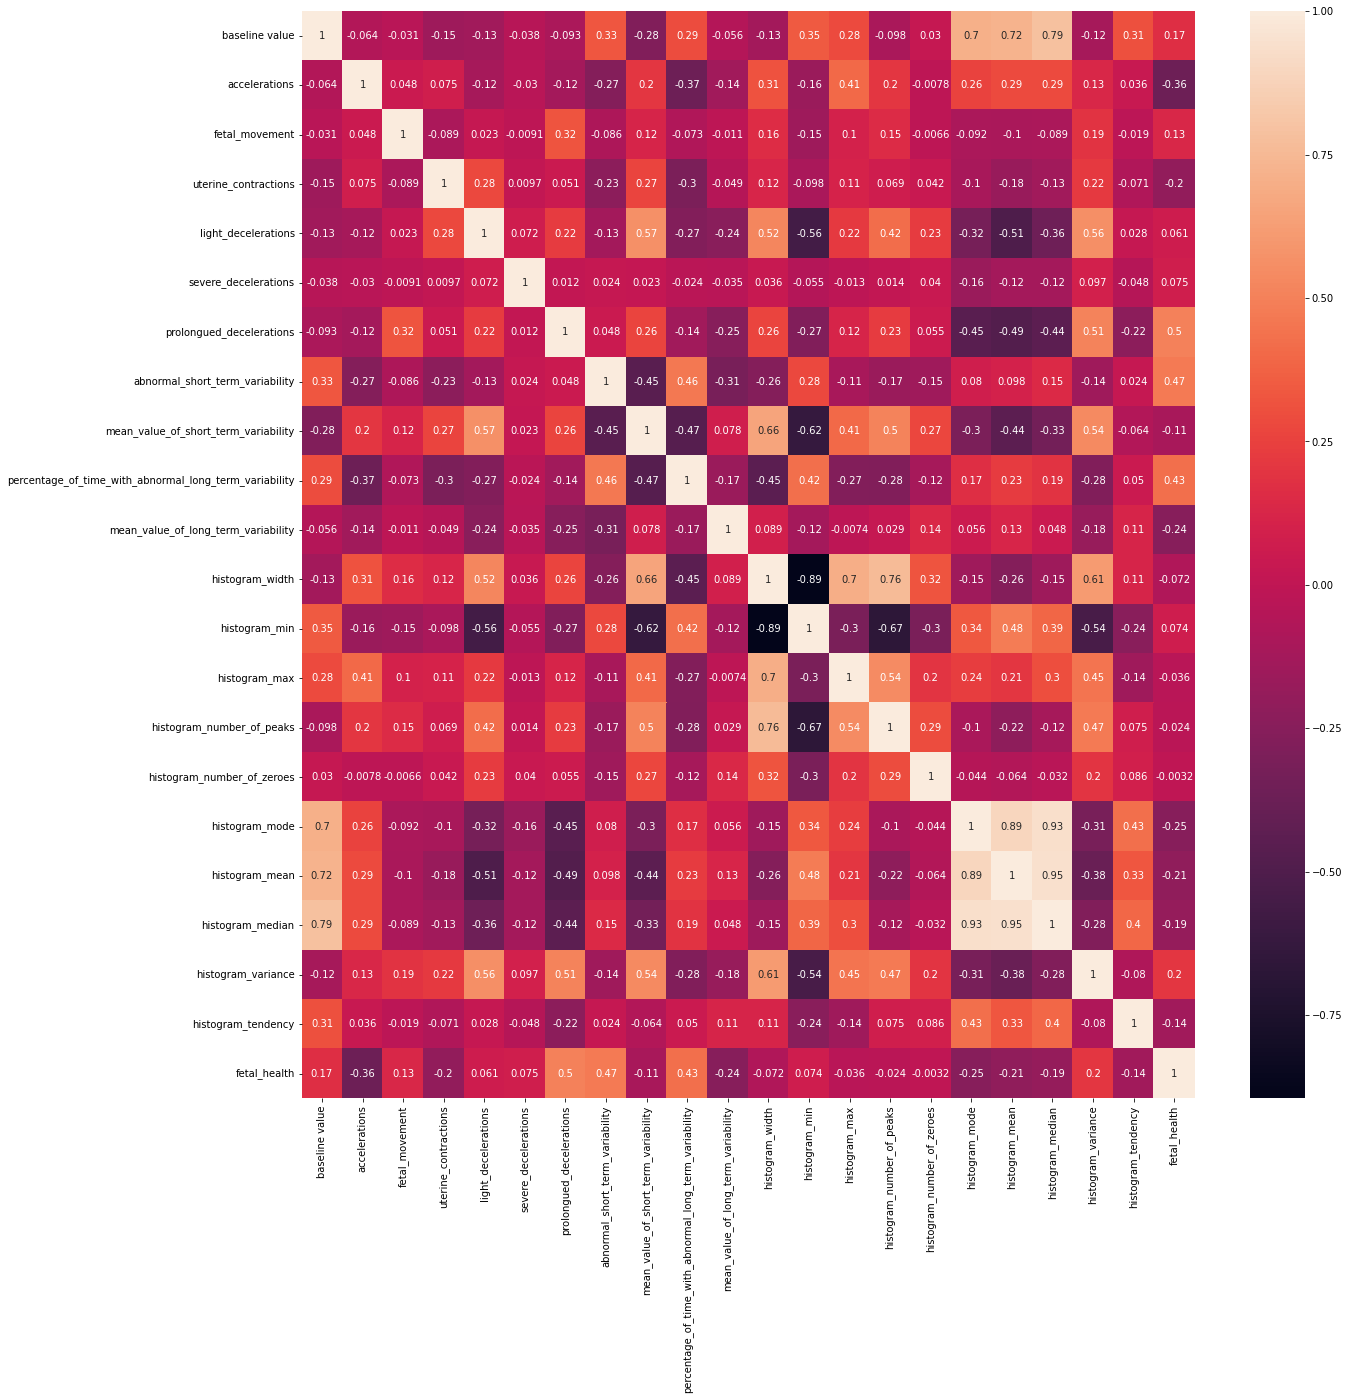

In [38]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

In [39]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features = correlation(df, 0.9)
len(set(corr_features))

1

In [41]:
corr_features

{'histogram_median'}

# FEATURE ENGINEERING

DROPPING SEVERE DECELERATIONS BECAUSE ONLY THREE VALUES ARE DIFFERENT IN THE WHOLE COLUMN

DROPPING histogram_median BECAUSE IT IS HIGHLY CORELATED WITH TWO OTHER FEATURES

In [42]:
df.drop(["severe_decelerations","histogram_median"],axis = 1,inplace =True)

In [43]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_variance,histogram_tendency,fetal_health
0,133.0,0.003,0.000,0.004,0.004,0.000,30.0,1.5,0.0,5.3,102.0,67.0,169.0,9.0,1.0,147.0,137.0,40.0,1.0,1.0
1,130.0,0.001,0.001,0.012,0.010,0.001,62.0,2.2,0.0,0.0,161.0,50.0,211.0,9.0,0.0,60.0,89.0,250.0,0.0,3.0
2,141.0,0.000,0.008,0.000,0.000,0.000,75.0,0.3,49.0,4.6,9.0,136.0,145.0,1.0,0.0,143.0,141.0,0.0,1.0,2.0
3,144.0,0.000,0.002,0.002,0.000,0.000,84.0,0.3,34.0,5.5,38.0,132.0,170.0,2.0,0.0,144.0,143.0,0.0,-1.0,3.0
4,106.0,0.001,0.000,0.011,0.000,0.000,63.0,0.6,0.0,11.5,30.0,95.0,125.0,1.0,0.0,112.0,110.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,138.0,0.012,0.000,0.007,0.001,0.000,50.0,1.2,0.0,1.4,98.0,73.0,171.0,7.0,0.0,148.0,146.0,11.0,1.0,1.0
1484,133.0,0.005,0.000,0.005,0.004,0.000,27.0,1.8,0.0,17.8,92.0,61.0,153.0,5.0,1.0,142.0,134.0,29.0,1.0,1.0
1485,110.0,0.003,0.002,0.006,0.007,0.002,68.0,3.1,0.0,0.0,133.0,60.0,193.0,8.0,0.0,91.0,83.0,42.0,-1.0,3.0
1486,130.0,0.005,0.000,0.001,0.000,0.000,73.0,0.6,9.0,5.0,32.0,126.0,158.0,2.0,0.0,139.0,140.0,3.0,0.0,1.0


In [44]:
X = df.drop(["fetal_health"],axis =1)
y = df["fetal_health"]

In [45]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)


## SMOTE

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm1, y_sm1 = smote.fit_resample(X_train, y_train)

y_sm1.value_counts()

1.0    927
3.0    927
2.0    167
Name: fetal_health, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_smf, y_smf = smote.fit_resample(X_sm1, y_sm1)

y_smf.value_counts()

2.0    927
1.0    927
3.0    927
Name: fetal_health, dtype: int64

# MODEL BUILDING

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## PIPELINES

In [49]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr_classifier',LogisticRegression())])

In [50]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('dt_classifier',DecisionTreeClassifier())])

In [51]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     
                     ('rf_classifier',RandomForestClassifier())])

In [52]:
pipeline_xg=Pipeline([('scalar4',StandardScaler()),
                     
                     ('xg_classifier',xgboost.XGBClassifier()
)])

In [53]:
pipeline_svc=Pipeline([('scalar5',StandardScaler()),
                     
                     ('svc_classifier',SVC())])

In [54]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_xg,pipeline_svc]

In [55]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [56]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'XG boost',4:'Svc'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_smf, y_smf)

In [57]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.8624161073825504
Decision Tree Test Accuracy: 0.9261744966442953
RandomForest Test Accuracy: 0.9362416107382551
XG boost Test Accuracy: 0.9362416107382551
Svc Test Accuracy: 0.8825503355704698


In [58]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [60]:
for i,model in enumerate(pipelines):
    y_pred=model.predict(X_test)
    print("{}:Accuracy Score ".format(pipe_dict[i]))
    print("{}".format(accuracy_score(y_test,y_pred)))
    print("{}:Classification report: ".format(pipe_dict[i]))
    print("{}".format(classification_report(y_test,y_pred)))
    print("{}:Confusion matrix:".format(pipe_dict[i]))
    print("{}".format(confusion_matrix(y_test,y_pred)))

Logistic Regression:Accuracy Score 
0.8624161073825504
Logistic Regression:Classification report: 
              precision    recall  f1-score   support

         1.0       0.99      0.89      0.94       231
         2.0       0.55      0.75      0.63        40
         3.0       0.62      0.78      0.69        27

    accuracy                           0.86       298
   macro avg       0.72      0.81      0.75       298
weighted avg       0.89      0.86      0.87       298

Logistic Regression:Confusion matrix:
[[206  19   6]
 [  3  30   7]
 [  0   6  21]]
Decision Tree:Accuracy Score 
0.9261744966442953
Decision Tree:Classification report: 
              precision    recall  f1-score   support

         1.0       0.97      0.96      0.96       231
         2.0       0.73      0.75      0.74        40
         3.0       0.89      0.89      0.89        27

    accuracy                           0.93       298
   macro avg       0.86      0.87      0.86       298
weighted avg       0.93

# HYPER PARAMETER TUNING

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
bestpipe = Pipeline([('scalar6',StandardScaler()),
                     
                     ('classifier',RandomForestClassifier())])

grid_param = {
                 "classifier__n_estimators": [10, 100,200,300, 500],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,50],
                 "classifier__max_leaf_nodes": [2, 5,10]}
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(bestpipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_smf,y_smf)

In [67]:
best_model.best_params_

{'classifier__max_depth': 8,
 'classifier__max_leaf_nodes': 10,
 'classifier__min_samples_leaf': 15,
 'classifier__n_estimators': 100}

In [68]:
pipefinal = Pipeline([('scalar7',StandardScaler()),
                     
                     ('classifier',RandomForestClassifier(max_depth= 8,max_leaf_nodes= 10,min_samples_leaf= 15,n_estimators= 100))
                     ])

In [69]:
pipefinal.fit(X_smf,y_smf)

Pipeline(steps=[('scalar7', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=8, max_leaf_nodes=10,
                                        min_samples_leaf=15))])

In [70]:
y_predd=pipefinal.predict(X_test)

In [71]:
print("Accuracy Score ")
print("{}".format(accuracy_score(y_test,y_predd)))
print(":Classification report: ")
print("{}".format(classification_report(y_test,y_predd)))
print("Confusion matrix:")
print("{}".format(confusion_matrix(y_test,y_predd)))

Accuracy Score 
0.8926174496644296
:Classification report: 
              precision    recall  f1-score   support

         1.0       0.98      0.90      0.94       231
         2.0       0.62      0.85      0.72        40
         3.0       0.80      0.89      0.84        27

    accuracy                           0.89       298
   macro avg       0.80      0.88      0.83       298
weighted avg       0.91      0.89      0.90       298

Confusion matrix:
[[208  18   5]
 [  5  34   1]
 [  0   3  24]]
